In [243]:
import pandas as pd
import numpy as np
import json
import ast



# Visalization
import seaborn as sns


In [244]:
import matplotlib.pyplot as plt

In [245]:
credits = pd.read_csv(r'..\data\the-movies-dataset\credits.csv')
credits.head(1)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


In [246]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [247]:
credits.isnull().any()

cast    False
crew    False
id      False
dtype: bool

In [248]:
credits = credits.set_index('id')

In [249]:
cast = pd.DataFrame(credits['cast'])
crew = pd.DataFrame(credits['crew'])

## Cast

In [250]:
cast.iloc[0,0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [251]:
cast.shape

(45476, 1)

In [252]:
cast['cast'] = cast['cast'].apply(ast.literal_eval)
cast['cast_size'] = cast['cast'].apply(lambda x: len(x))
cast['cast_order'] = cast['cast'].apply(lambda x: [i['order'] for i in x] if isinstance(x, list) else [])
cast['cast_name'] = cast['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
cast['cast_gender'] = cast['cast'].apply(lambda x: [i['gender'] for i in x] if isinstance(x, list) else [])

In [253]:
cast.head(2)

,cast,cast_size,cast_order,cast_name,cast_gender
id,,,,,
862,"[{'cast_id': 14, 'character': 'Woody (voice)',...",13,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2]"
8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",26,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ..."


In [254]:
cast.iloc[0, 2]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [255]:
cast.shape

(45476, 5)

In [256]:
credits_order = []
actors_name = []
actors_gender = []
actors = {'credits_order': credits_order, 'actors': actors_name, 'gender': actors_gender}
for e in range(45476):
    for i in cast.iloc[e, 2]:
        credits_order.append(i)
    for i in cast.iloc[e, 3]:
        actors_name.append(i)
    for i in cast.iloc[e, 4]:
        actors_gender.append(i)
actors = pd.DataFrame(actors)
print("Done")

Done


In [257]:
actors.loc[actors.gender != 0]

,credits_order,actors,gender
0,0,Tom Hanks,2
1,1,Tim Allen,2
2,2,Don Rickles,2
3,3,Jim Varney,2
4,4,Wallace Shawn,2
...,...,...,...
562467,13,Peter Dobson,2
562469,0,Iwan Mosschuchin,2
562470,1,Nathalie Lissenko,1
562471,2,Pavel Pavlov,2


In [258]:
actors['actors'].value_counts().head(10)

Bess Flowers         241
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    123
Michael Caine        110
Gérard Depardieu     110
John Carradine       109
Donald Sutherland    109
Jackie Chan          108
Frank Welker         107
Name: actors, dtype: int64

The 10 most prolific actors in this dataset. It must be noted that most of the entries correspond with classic actors; therefore it is difficult to try to establish some kind of popularity measure, as most of these actors are dead.

In [259]:
gender = lambda x: "Female" if x == 1 else ("Male" if x == 2 else x)

In [260]:
actors.gender = actors.gender.apply(gender)

In [261]:
genders = actors.gender.value_counts()
genders

Male      226713
0         223964
Female    111797
Name: gender, dtype: int64

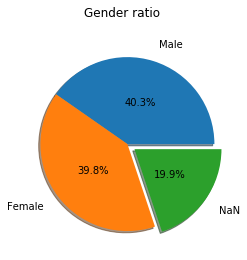

In [262]:
labels = 'Male', 'Female', 'NaN'
explode = 0, 0, 0.1

plt.pie(genders,  autopct='%1.1f%%', startangle=0, explode= explode, labels= labels, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
plt.suptitle('Gender ratio', fontsize=12)

plt.show()

In [263]:
# 0 replace for None and Backwards Fill
actors['gender'] = actors['gender'].replace(0, None)
actors['gender'] =  actors['gender'].fillna(method='bfill')

In [264]:
actors['gender']

0           Male
1           Male
2           Male
3           Male
4           Male
           ...  
562469      Male
562470    Female
562471      Male
562472      Male
562473    Female
Name: gender, Length: 562474, dtype: object

In [265]:
genders2 = actors.gender.value_counts()
genders2

Male      379225
Female    183249
Name: gender, dtype: int64

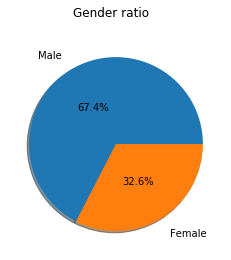

In [266]:
labels = 'Male', 'Female'

plt.pie(genders2,  autopct='%1.1f%%', startangle=0, labels= labels, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
plt.suptitle('Gender ratio', fontsize=12)

plt.show()

2/3rds of the pool identifies as male, while the rest identifies as female. This is however after the fill method. Before the population was more levelled.

It is also necessary to represent also the gender distribution by credits order. As this will display the frequency of a male-female protagonist. For this, the top 5 credit entries will be selected, as by convention, the best paid actors are listed on the top.

In [300]:
top_5_actors = actors.groupby('credits_order')['gender'].value_counts().head(10)
top_5_actors_2 = actors.groupby('credits_order')['gender'].count().head(5)

print(f"Top 5 billing actors:\n{top_5_actors}\n\nTotal sum for billing level:\n{top_5_actors_2}")

Top 5 billing actors:
credits_order  gender
0              Male      26149
               Female    10598
1              Male      25243
               Female    16346
2              Male      25111
               Female    15313
3              Male      25078
               Female    14222
4              Male      24601
               Female    12595
Name: gender, dtype: int64

Total sum for billing level:
credits_order
0    36747
1    41589
2    40424
3    39300
4    37196
Name: gender, dtype: int64


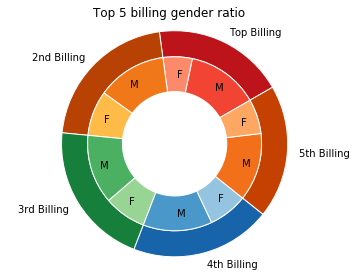

In [268]:
labels = ['Top Billing', '2nd Billing', '3rd Billing', '4th Billing', '5th Billing']
group_size = top_5_actors_2
labels2 = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']
subgroup_size = top_5_actors
 
# Create colors
a, b, c, d, e = [ plt.cm.Reds, plt.cm.YlOrBr, plt.cm.Greens, plt.cm.Blues, plt.cm.Oranges]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius = 1.3, colors=[a(0.8), b(0.8), c(0.8), d(0.8), e(0.8)], labels = labels, startangle = 30)
plt.setp( mypie, width=0.3, edgecolor ='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labeldistance=0.8, colors=[a(0.6), a(0.4), b(0.6), b(0.4), c(0.6), c(0.4), d(0.6), d(0.4), e(0.6), e(0.4)], labels = labels2, startangle = 30)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 

plt.suptitle('Top 5 billing gender ratio', fontsize=12) 
plt.show()

As the pie shows, the proportion still shows little in the way of equality. It is particularly noticeable in the Top Billing slice.

## Credits

In [297]:
# crew.iloc[0,0]
# If scrpit already initialized use:
# crew.iloc[0,1]

In [270]:
# Lambdas for data extraction. The return data is introduced into a list in order to better operate with it in the future. They cover the director, producer and writer roles. Though many more remain unexplored.

director_name = lambda x: [i['name']for i in x if i['department'] == 'Directing']
director_gender = lambda x: [i['gender']for i in x if i['department'] == 'Directing']

producer_name = lambda x: [i['name']for i in x if i['department'] == 'Production']
producer_gender = lambda x: [i['gender']for i in x if i['department'] == 'Production']

writer_name = lambda x: [i['name']for i in x if i['department'] == 'Writing']
writer_gender = lambda x: [i['gender']for i in x if i['department'] == 'Writing']

In [271]:
crew['crew'] = crew['crew'].apply(ast.literal_eval)
crew['crew_len'] = crew['crew'].apply(lambda x: len(x))

# director data
crew['director'] = crew['crew'].apply(director_name)
crew['director_gender'] = crew['crew'].apply(director_gender)

# producer data
crew['producer'] = crew['crew'].apply(producer_name)
crew['producer_gender'] = crew['crew'].apply(producer_gender)

# writer data
crew['writer'] = crew['crew'].apply(writer_name)
crew['wirter_gender'] = crew['crew'].apply(writer_gender)

In [272]:
crew

,crew,crew_len,director,director_gender,producer,producer_gender,writer,wirter_gender
id,,,,,,,,
862,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",106,"[John Lasseter, Roman Figun, Desirée Mourad]","[2, 0, 0]","[Bonnie Arnold, Ed Catmull, Ralph Guggenheim, ...","[1, 0, 2, 2, 0, 0, 0, 1, 0]","[Joss Whedon, Andrew Stanton, Joel Cohen, Alec...","[2, 2, 2, 0, 2, 2, 0, 2]"
8844,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",16,[Joe Johnston],[2],"[Larry J. Franco, Nancy Foy, Scott Kroopf, Ted...","[2, 0, 2, 2, 2, 2]","[Jonathan Hensleigh, Chris van Allsburg, Greg ...","[2, 2, 2, 2]"
15602,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",4,[Howard Deutch],[2],[],[],"[Mark Steven Johnson, Mark Steven Johnson]","[2, 2]"
31357,"[{'credit_id': '52fe44779251416c91011acb', 'de...",10,[Forest Whitaker],[2],"[Ronald Bass, Ezra Swerdlow, Deborah Schindler...","[0, 2, 1, 0, 0]","[Ronald Bass, Terry McMillan, Terry McMillan]","[0, 0, 0]"
11862,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",7,[Charles Shyer],[2],[Nancy Meyers],[1],"[Nancy Meyers, Albert Hackett]","[1, 2]"
...,...,...,...,...,...,...,...,...
439050,"[{'credit_id': '5894a97d925141426c00818c', 'de...",9,[Hamid Nematollah],[0],[Hamid Nematollah],[0],[],[]
111109,"[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",6,[Lav Diaz],[0],[],[],[Lav Diaz],[0]
67758,"[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",5,[Mark L. Lester],[2],[],[],"[C. Courtney Joyner, Jeffrey Goldenberg]","[2, 2]"


In [273]:
crew = crew.reset_index()

In [274]:
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 9 columns):
id                 45476 non-null int64
crew               45476 non-null object
crew_len           45476 non-null int64
director           45476 non-null object
director_gender    45476 non-null object
producer           45476 non-null object
producer_gender    45476 non-null object
writer             45476 non-null object
wirter_gender      45476 non-null object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


In [275]:
crew.id = crew.id.astype(str)
crew.id.dtype

dtype('O')

In [276]:
crew.head(6)

,id,crew,crew_len,director,director_gender,producer,producer_gender,writer,wirter_gender
0,862,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",106,"[John Lasseter, Roman Figun, Desirée Mourad]","[2, 0, 0]","[Bonnie Arnold, Ed Catmull, Ralph Guggenheim, ...","[1, 0, 2, 2, 0, 0, 0, 1, 0]","[Joss Whedon, Andrew Stanton, Joel Cohen, Alec...","[2, 2, 2, 0, 2, 2, 0, 2]"
1,8844,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",16,[Joe Johnston],[2],"[Larry J. Franco, Nancy Foy, Scott Kroopf, Ted...","[2, 0, 2, 2, 2, 2]","[Jonathan Hensleigh, Chris van Allsburg, Greg ...","[2, 2, 2, 2]"
2,15602,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",4,[Howard Deutch],[2],[],[],"[Mark Steven Johnson, Mark Steven Johnson]","[2, 2]"
3,31357,"[{'credit_id': '52fe44779251416c91011acb', 'de...",10,[Forest Whitaker],[2],"[Ronald Bass, Ezra Swerdlow, Deborah Schindler...","[0, 2, 1, 0, 0]","[Ronald Bass, Terry McMillan, Terry McMillan]","[0, 0, 0]"
4,11862,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",7,[Charles Shyer],[2],[Nancy Meyers],[1],"[Nancy Meyers, Albert Hackett]","[1, 2]"
5,949,"[{'credit_id': '52fe4292c3a36847f802916d', 'de...",71,"[Michael Mann, Cate Hardman, Michael Waxman]","[2, 1, 0]","[Art Linson, Michael Mann, Bonnie Timmermann, ...","[2, 2, 1, 0, 2, 0, 2, 0, 0]",[Michael Mann],[2]


In [277]:
movie_id = []
directors_name = []
directors_gender = []
directors = {'movie_id': movie_id, 'directors_name': directors_name, 'directors_gender': directors_gender}
for e in range(45476):
    for i in crew.iloc[e, 3]:
        idm = crew.iloc[e, 0]
        movie_id.append(idm)
        directors_name.append(i)
    for i in crew.iloc[e, 4]:
        directors_gender.append(i)
directors = pd.DataFrame(directors)
print("Done")

Done


In [278]:
directors.head(6)

,movie_id,directors_name,directors_gender
0,862,John Lasseter,2
1,862,Roman Figun,0
2,862,Desirée Mourad,0
3,8844,Joe Johnston,2
4,15602,Howard Deutch,2
5,31357,Forest Whitaker,2


In [279]:
movie_id = []
producers_name = []
producers_gender = []
producers = {'movie_id': movie_id, 'producers_name': producers_name, 'producers_gender': producers_gender}
for e in range(45476):
    for i in crew.iloc[e, 5]:
        idm = crew.iloc[e, 0]
        movie_id.append(idm)
        producers_name.append(i)
    for i in crew.iloc[e, 6]:
        producers_gender.append(i)
producers = pd.DataFrame(producers)
print("Done")

Done


In [280]:
producers.head(6)

,movie_id,producers_name,producers_gender
0,862,Bonnie Arnold,1
1,862,Ed Catmull,0
2,862,Ralph Guggenheim,2
3,862,Steve Jobs,2
4,862,Karen Robert Jackson,0
5,862,Lori Lombardo,0


In [281]:
nan_id = lambda x: "NaN" if x == 0 else x

In [282]:
# Replace 1 and 2 for Female and Male
directors.directors_gender = directors.directors_gender.apply(gender)
producers.producers_gender = producers.producers_gender.apply(gender)

# To replace NaNs in dfs
directors.directors_gender = directors.directors_gender.apply(nan_id)
producers.producers_gender = producers.producers_gender.apply(nan_id) 

In [294]:
pro_gend_count = producers.producers_gender.value_counts()
dir_gend_count = directors.directors_gender.value_counts()
print(f'Directors:\n{dir_gend_count}\n\nProducers:\n{pro_gend_count}')

Directors:
Male      52083
Female     6051
Name: directors_gender, dtype: int64

Producers:
Male      69174
Female    25324
Name: producers_gender, dtype: int64


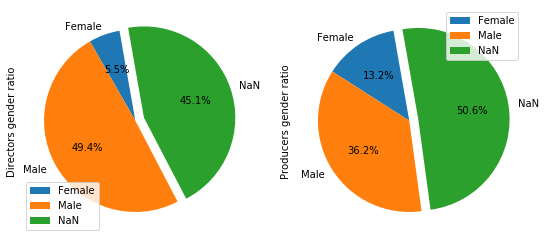

In [293]:
df = pd.DataFrame({'Directors gender ratio':dir_gend_count, 'Producers gender ratio':pro_gend_count})

explode = 0, 0,0.1
plot = df.plot.pie(subplots=True, figsize=(9, 6), startangle=100, autopct='%1.1f%%', explode=explode)

The number of NaN values is much higher than expected. NaN values have been observed in both genders, so it is expected that the ratios will not change in any significant manner after the fillna method is applied.

In [289]:
# NaN replace for None and Backwards Fill
directors['directors_gender'] = directors['directors_gender'].replace('NaN', None)
directors['directors_gender'] = directors['directors_gender'].fillna(method='bfill')

producers['producers_gender'] = producers['producers_gender'].replace('NaN', None)
producers['producers_gender'] =  producers['producers_gender'].fillna(method='bfill')

In [290]:
dir_gend_count2 = directors.directors_gender.value_counts()
pro_gend_count2 = producers.producers_gender.value_counts()

print(f'Directors:\n{dir_gend_count2}\n\nProducers:\n{pro_gend_count2}')

Directors:
Male      52083
Female     6051
Name: directors_gender, dtype: int64

Producers:
Male      69174
Female    25324
Name: producers_gender, dtype: int64


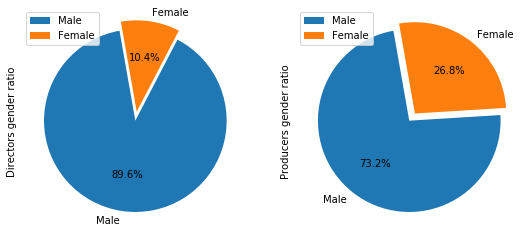

In [291]:
df2 = pd.DataFrame({'Directors gender ratio':dir_gend_count2, 'Producers gender ratio':pro_gend_count2})

explode = 0, 0.1
plot = df2.plot.pie(subplots=True, figsize=(9, 6), startangle=100, autopct='%1.1f%%', explode= explode)

Despite the fill method, the pattern remains. The female presence in the workforce is much lower both in the directors and producers' role. Nonetheless it should be stressed that the number of female producers far exceeds that of the female directors. 